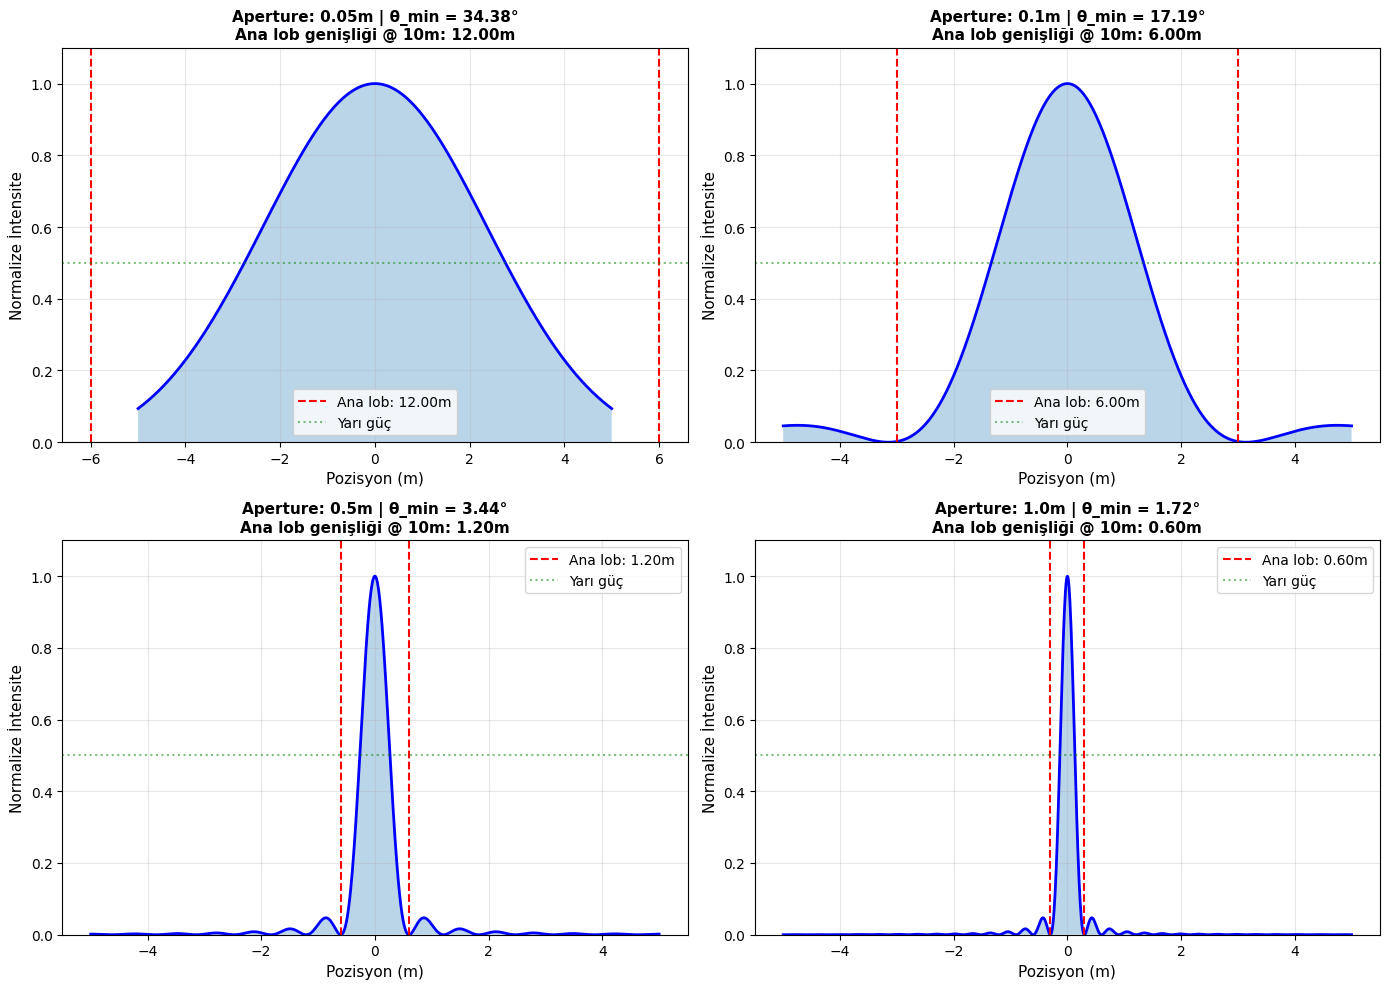


 Aperture (D)   |      θ_min      |    Ana Lob @ 10m     |           Yorum          
     0.05       |      34.38     ° |        12.00        m |        Çok geniş!        
     0.10       |      17.19     ° |         6.00        m |        Çok geniş!        
     0.50       |      3.44      ° |         1.20        m |           Orta           
     1.00       |      1.72      ° |         0.60        m |           Orta           


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def single_slit_diffraction(x, D, lambda_c, distance):
    """
    Tek yarık difraksiyon paterni
    """
    # Difraksiyon açısı
    theta = np.arctan(x / distance)
    
    # Difraksiyon formülü
    beta = (np.pi * D / lambda_c) * np.sin(theta)
    
    # İntensite (sinc^2)
    # Sıfır bölmeden kaçınmak için
    with np.errstate(divide='ignore', invalid='ignore'):
        intensity = np.where(beta != 0, (np.sin(beta) / beta)**2, 1.0)
    
    return intensity

# Parametreler
lambda_c = 0.03  # 3 cm (10 GHz)
distance = 10    # 10 metre mesafe

# Farklı aperture boyutları
apertures = [0.05, 0.1, 0.5, 1.0]  # metre

# Ekran pozisyonları
x = np.linspace(-5, 5, 1000)  # metre

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, D in enumerate(apertures):
    ax = axes[idx // 2, idx % 2]
    
    # Difraksiyon paterni
    intensity = single_slit_diffraction(x, D, lambda_c, distance)
    
    # Ana lob genişliği (ilk sıfıra kadar)
    main_lobe_width = 2 * distance * (lambda_c / D)
    
    # Çiz
    ax.plot(x, intensity, 'b-', linewidth=2)
    ax.fill_between(x, 0, intensity, alpha=0.3)
    
    # Ana lob sınırlarını göster
    ax.axvline(-main_lobe_width/2, color='r', linestyle='--', 
               label=f'Ana lob: {main_lobe_width:.2f}m')
    ax.axvline(main_lobe_width/2, color='r', linestyle='--')
    
    # Yarı güç noktaları
    ax.axhline(0.5, color='g', linestyle=':', alpha=0.5, label='Yarı güç')
    
    ax.set_xlabel('Pozisyon (m)', fontsize=11)
    ax.set_ylabel('Normalize İntensite', fontsize=11)
    ax.set_title(f'Aperture: {D}m | θ_min = {np.rad2deg(lambda_c/D):.2f}°\n'
                f'Ana lob genişliği @ {distance}m: {main_lobe_width:.2f}m', 
                fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

# Özet
print("\n" + "="*80)
print(f"{'Aperture (D)':^15} | {'θ_min':^15} | {'Ana Lob @ 10m':^20} | {'Yorum':^25}")
print("="*80)
for D in apertures:
    theta_min = np.rad2deg(lambda_c / D)
    main_lobe = 2 * distance * (lambda_c / D)
    comment = "Çok geniş!" if main_lobe > 2 else "Dar" if main_lobe < 0.5 else "Orta"
    print(f"{D:^15.2f} | {theta_min:^15.2f}° | {main_lobe:^20.2f}m | {comment:^25}")
print("="*80)